> ### EEE3314-02: Introduction to Artificial Intelligence

# Assignment \# V: K-means clustering

<div style="text-align: right"> **Due date: Nov. 30, 2018.** </div> 
<div style="text-align: right"> **Please upload your file @ yscec by 9 PM.** </div> 
<h4><div style="text-align: right"> **For one day late (70% credit), please send your file to your TAs in the form of [ID_Name_HW5.ipynb].**</div> </h4>

### *Assignement Instructions:*
- Write a program implementing a particular algorithm to solve a given problem.   
- <h4><span style="color:red">**Report and discuss your results. Analyze the algorithm, theoretically and empirically. **</span> </h4>

### *Collaboration policy:*
- You may discuss the questions.   
- Each student writes their own answers.   
- **Write on your homework anyone with whom you collaborate.**   
- Each student must write their own code for the programming part (**if not you will get a F grade**).

In [1]:
import datetime
print("This code is written at " + str(datetime.datetime.now()))

This code is written at 2018-11-20 22:39:51.790157


## Problem description

In this homework, we will implement a k-means clustering algorihms, one of unsueprvised learning approaches. The unlabeled dataset ($\texttt{kmeans.csv}$) contains two features ($\texttt{x1}$ and $\texttt{x2}$), and you can visualize the distributions of data as follows.

In [2]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

In [3]:
# input data
df = pd.read_csv('kmeans.csv')
df.head()

,x1,x2
0,2.072345,-3.241693
1,17.936710,15.784810
2,1.083576,7.319176
3,11.120670,14.406780
4,23.711550,2.557729


In [4]:
df.mean()

x1    40.611358
x2    22.862141
dtype: float64

2.072345


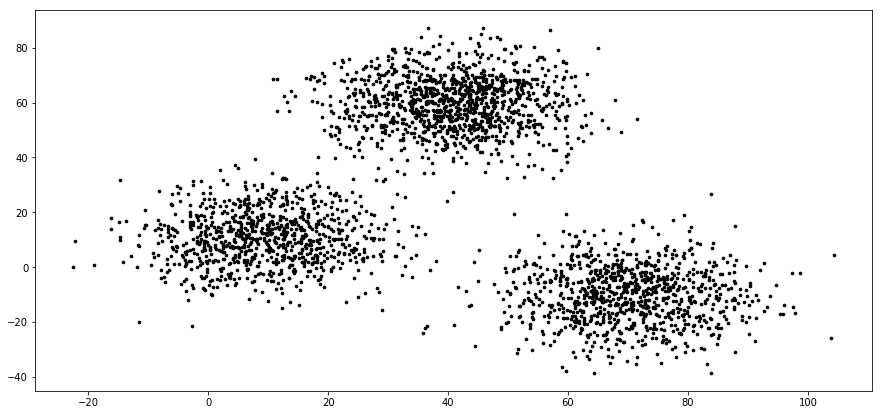

In [5]:
# plot
x1 = df['x1'].values
x2 = df['x2'].values
plt.rcParams['figure.figsize'] = (15, 7)
plt.scatter(x1, x2, c='k', s = 7) 
print(x1[0])

### I. K-means clustering 
(*70 points*) P1.1 Implement a k-means clustering method. It inputs the features and the number of clusters $k$, and outputs cluster labels and centers. Initialize cluster centers randomly and use the Euclidean distance.  

(*10 points*) P1.2 Visualize cluster labels and centers for different $k$ values where $k=1,2,3,6,10$. To plot cluster labels, use different colors to indicate different memberships (cluster labels). 

In [6]:
#P1.1
import random
import math

def distance_check(x, c):
    distance = []
    for k in range(len(c)):
        distance.append(pow((x[0] - c[k][0]),2) + pow((x[1] - c[k][1]),2))
    return distance.index(min(distance))

def center_distance(p_c, c):
    summation = 0
    for i in range(len(p_c)):
        summation = summation + math.sqrt(pow((p_c[i][0] - c[i][0]),2) + pow((p_c[i][1] - c[i][1]),2))
    return summation

def k_means(k, x1, x2):
    centers = []
    i = 0
    for i in range(k):
        centers.append([random.uniform(-20,100), random.uniform(-40, 80)])
    
    convergence = 10
    iteration = 0  
    while(convergence > 0.000001):
        for i in range(10):
            pre_centers = centers
            label = []   
            for i in range(x1.shape[0]):
                label.append(distance_check([x1[i], x2[i]], centers))

            for k in range(len(centers)):
                total = [0, 0]
                count = 0
                for i in range(len(label)):
                    if(label[i] == k):
                        total[0] = total[0] + x1[i]
                        total[1] = total[1] + x2[i]
                        count += 1
                if(count != 0):
                    centers[k] = [total[0]/count, total[1]/count]
            convergence = center_distance(pre_centers, centers)
    return [label, centers]

# Description

강의자료 19 page에 있는 알고리즘을 그대로 구현했다. 
1. 먼저 random 함수를 사용해 k개의 cluster centers를 랜덤하게 initialize했다.
2. 두 번째로 distance_check 함수에서 가장 가까운 center를 구해 labeling을 해주었다. 
3. label을 이용해 같은 label끼리의 중앙 값을 구해 center를 업데이트해주었다. 
4. convergence를 확인하기 위해 center_distance 함수를 구현했는데 이는 이전 센터와 바뀐 센터의 거리를 구해주는 함수이다. 이 조건을 이용해 수렴할 때까지 iteration을 반복한다.
마지막으로 수렴하면, label과 ceneter들을 리턴해준다.

k =  1
centers =  [[40.611358424629984, 22.862141031766033]]


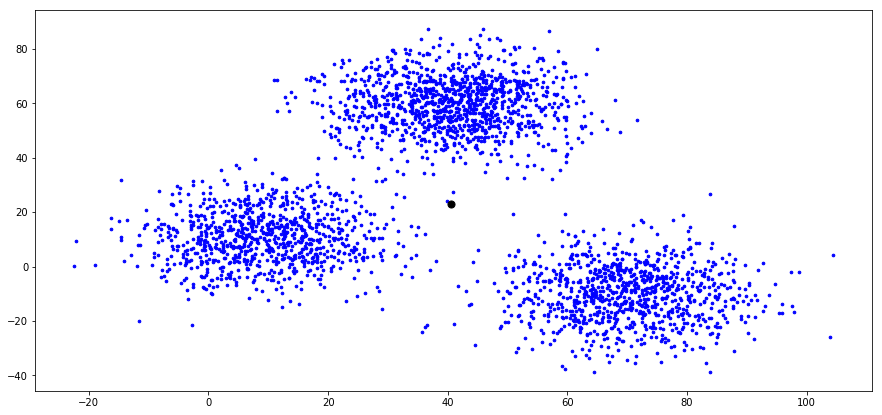

k =  2
centers =  [[54.150186363200696, 28.08142378101008], [9.663347572716324, 10.931535229277102]]


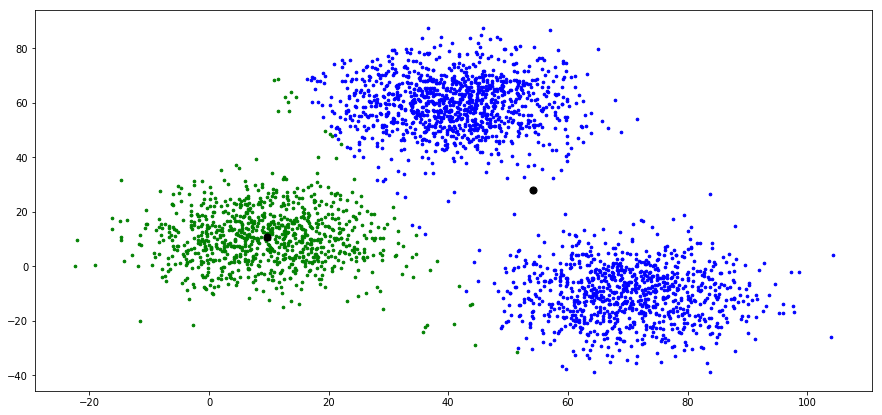

k =  3
centers =  [[69.92418447478987, -10.119641194361344], [9.478045899766407, 10.686052004816458], [40.68362784160133, 59.7158927415144]]


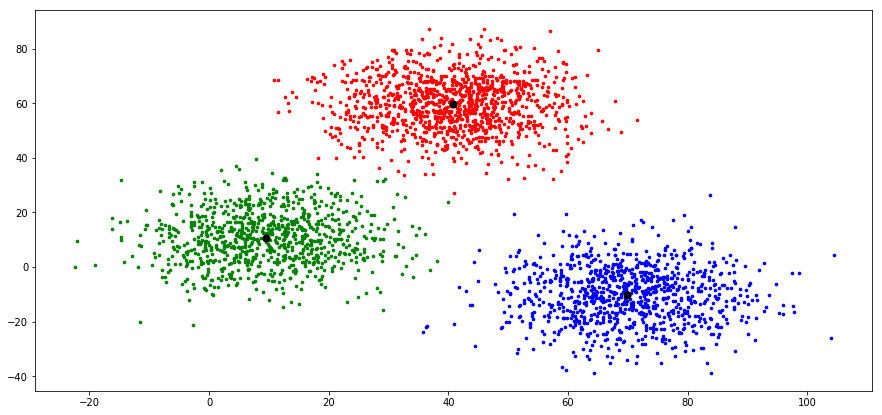

k =  6
centers =  [[0.33209536270700635, 5.480654767515919], [20.026192237410065, 4.785046886079136], [70.16347205508467, -10.14538626274576], [10.12966426582279, 20.692916474683543], [33.17068639175258, 57.36653336769759], [48.448559858657205, 62.16645772084809]]


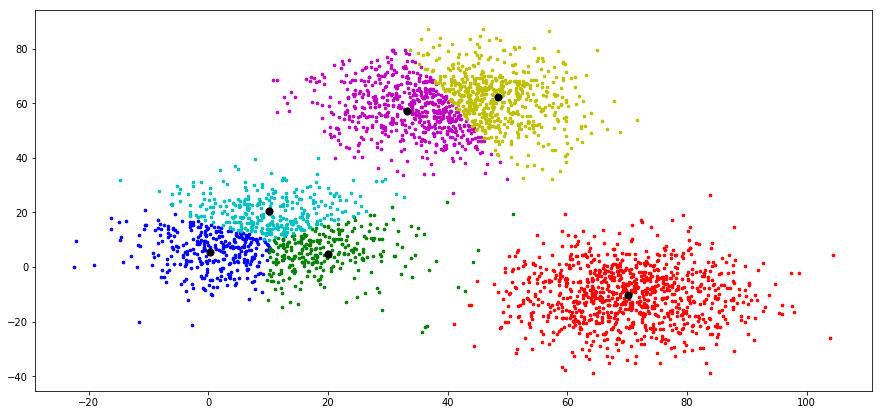

k =  10
centers =  [[37.63644579185523, 49.651063257918565], [25.771574455445545, 69.67338346534652], [52.97240624999999, 66.73195232142858], [15.582387436494841, 14.857908396041237], [41.032923910034604, 67.19126024221455], [50.831617230769226, 50.57603907692305], [29.44640707865167, 57.344142640449434], [2.1331024992457412, 5.609518297445253], [75.07411040089085, -17.253434008017802], [65.32713330019882, -3.751702877598413]]


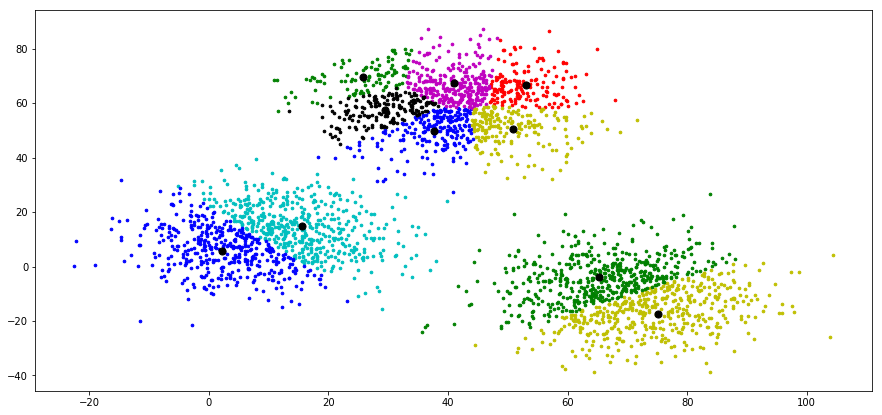

In [8]:
for i in [1, 2, 3, 6, 10]:
    print("k = ", i)
    output = k_means(i, x1, x2)    
    plt.rcParams['figure.figsize'] = (15, 7)
    color = ['b', 'g', 'r', 'c', 'm', 'y', 'k', 'b', 'y', 'g']
    for k in range(len(output[1])):
        for i in range(len(output[0])):
            if(output[0][i] == k):
                plt.scatter(x1[i], x2[i], c = color[k], s = 7)

    for k in range(len(output[1])):
        plt.scatter(output[1][k][0], output[1][k][1], c = 'k', s = 50)
    print("centers = ", output[1])
    plt.show()

# Description

k = 1,2,3,6,10 일 때 각각 plot을 해주었다. return 받은 center들도 검은색 점으로 표현해 주었다. k가 1과 3일 때는 결과가 변하지 않지만 다른 경우에는 실행할 때마다 변하는 것을 확인했다. 

### II. Evaluation 
(*20 points*) P2.1 Compute cluster heterogeneities for each $k$, and find the best one. 

k =  1
heterogeneity =  5030433.09612008
k =  2
heterogeneity =  2309985.389168783
k =  3
heterogeneity =  611605.8806933896
k =  6
heterogeneity =  413802.19629442313
k =  10
heterogeneity =  265863.1966352494


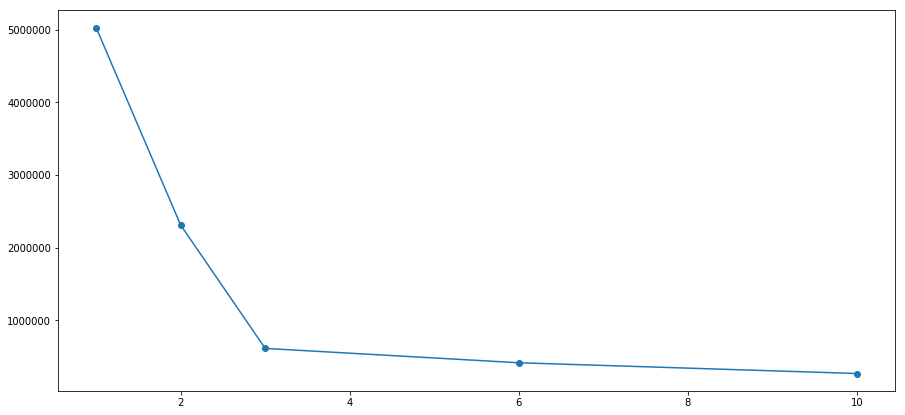

In [9]:
def distance (c, x):
    return (pow((c[0] - x[0]),2) + pow((c[1] - x[1]),2))

k_list = [1, 2, 3, 6, 10]
hetero_list = []
for k in k_list:
    print("k = ", k)
    output = k_means(k, x1, x2) #output = [[labels], [centers]]
    hetero = 0
    for i in range(len(output[0])):
        hetero = hetero + distance(output[1][output[0][i]], [x1[i], x2[i]])
    hetero_list.append(hetero)
    print("heterogeneity = ", hetero)
plt.plot(k_list, hetero_list, marker='o')
plt.show()

# Description

30 page에 나와있는 sum of squared distances를 모두 구해서 더해주었다. heterogeneity는 낮은 것이 좋지만 heuristic하게 고르자면 k = 3일 때가 가장 좋다고 볼 수 있다. 1번의 결과 그림에서도 볼 수 있고 위 그래프에서 k = 2 에서 3으로 갈 때 y값이 급격하게 떨어지는 것을 볼 수 있다. 